In [1]:
"""

Emulating the ratio of P_mg/P_lcdm for 


Requires the following installations:

1. R (R studio is the easiest option: https://www.rstudio.com/products/rstudio/download/).
Installing R packages is easy, in R studio, command install.packages("package_name") works
(https://www.dummies.com/programming/r/how-to-install-load-and-unload-packages-in-r/)
The following R packages are required:
    1a. RcppCNPy
    1b. DiceKriging
    1c. GPareto

2. rpy2 -- which runs R under the hood (pip install rpy2 should work)
# http://rpy.sourceforge.net/rpy2/doc-2.1/html/index.html
# conda install -c r rpy2

Built by N. Ramachandra and M. Binois 
"""

##### Generic packages ###############
import numpy as np
import matplotlib.pylab as plt
import time
import glob
import os
import SetPub
SetPub.set_pub()

"""
GP emulation
"""
##### Packages ###############

import pickle
from sklearn.decomposition import PCA
import GPy
import matplotlib.ticker as ticker


(array([0.255, 2.918]), (0.23232346464646464, 3.3043435217434345))

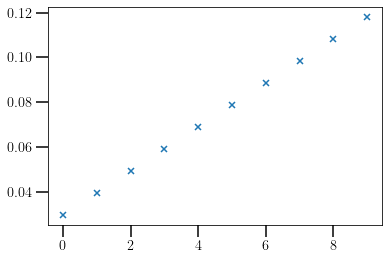

In [2]:
def snapIDtoz(ID):
    a = np.linspace( 0 , 1.000001, 100)[ID]
    z = (1./a) - 1
    return a, z
snapIDtoz(23)


az = np.loadtxt('./Data/Emulator_data/timestepsCOLA.txt', skiprows=1)

plt.plot(az[:10, 0], 'x')

az[23], snapIDtoz(23)

In [3]:

############################# PARAMETERS ##############################


def rescale01(f):
    return np.min(f), np.max(f), (f - np.min(f)) / (np.max(f) - np.min(f))

def unscale(fmin, fmax, f):
    return (f*(fmax - fmin)) + np.min(f)


dirIn = './Data/'

dataDir = "./Data/Emulator_data/" ## Data folder
dataDir = "./Data/Emulator213bins/" ## Data folder
modelDir = "./Models/" ## Data folder
plotsDir = "./Plots/" ## Data folder

paramIn = dataDir + 'mg.design'  ## 8 parameter file

snap_ID = 97
z_ID = az[snap_ID, 1]

fileIn = dataDir + 'ratiosbins_' + str(snap_ID) + '.txt'
# fileIn = dataDir + 'ratios_' + str(snap_ID) + '.txt'

nRankMax = 4 ## Number of basis vectors in truncated PCA
GPmodel = 'GPy_model_213Smooth_rank' + str(nRankMax) + 'snap' + str(snap_ID)  ## Double and single quotes are necessary
## DELETE the GPmodels or provide a new name if you want a new calculation
# num_holdout = 4
print(GPmodel)
################################# I/O #################################

# RcppCNPy = importr('RcppCNPy')
# RcppCNPy.chooseCRANmirror(ind=1) # select the first mirror in the list


loadFile = np.loadtxt(fileIn)
PmPl_all = loadFile[:, 1:].T
parameter_array_all = np.loadtxt(paramIn)
kvals = loadFile[:,0]



############## rescaling ##############


lhd = np.zeros_like(parameter_array_all)
for i in range(parameter_array_all.shape[1]):
    _,_, lhd[:, i] = rescale01(parameter_array_all[:, i])
   

parameter_array_all = lhd

Pm_min, Pm_max, PmPl_all = rescale01(loadFile[:, 1:].T)

############## rescaling ##############



del_idx =  [5, 25, 4, 42]  ## holdouts for testing
PmPl = np.delete(PmPl_all, del_idx, axis = 0)


parameter_array = np.delete(parameter_array_all, del_idx, axis = 0)


GPy_model_213Smooth_rank4snap97


In [4]:
#### adding smoothing filter ########

import scipy.signal
yhat = scipy.signal.savgol_filter(PmPl[:,:], 51, 3) # window size 51, polynomial order 3
y_train = yhat

####################################

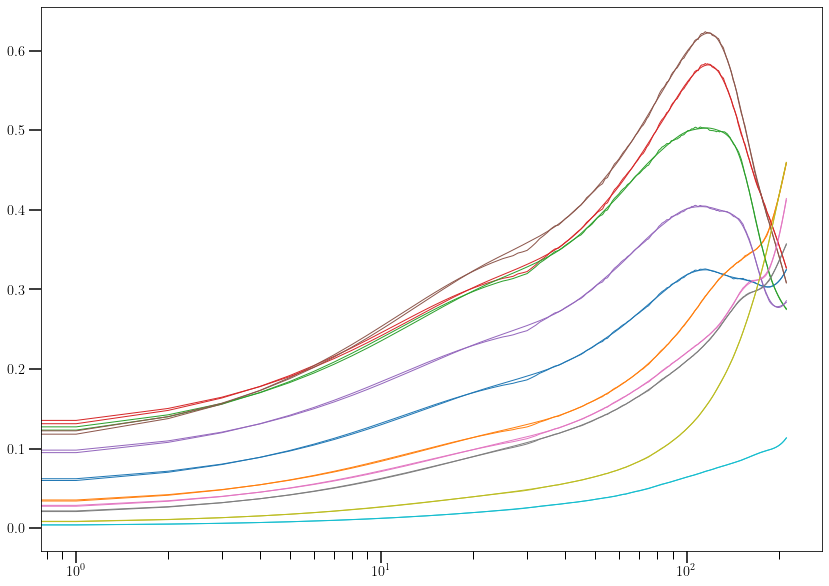

In [5]:
import scipy.signal

yhat = scipy.signal.savgol_filter(y_train, 51, 3) # window size 51, polynomial order 3


plt.figure(121, (14,10))
plt.plot( np.array(y_train).T[:,0:10])
plt.plot( np.array(yhat).T[:,0:10])
plt.xscale('log')


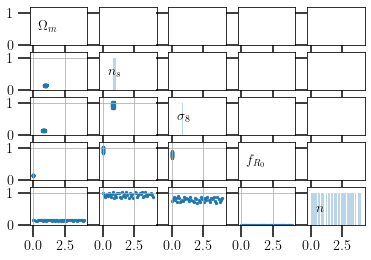

In [6]:

allLabels = [r'${\Omega}_m$', r'$n_s$', r'${\sigma}_8$', r'$f_{R_0}$', r'$n$']
lhd = parameter_array

PlotAll = False
num_para = 5

##
if PlotAll:
	import matplotlib.pylab as plt
	f, a = plt.subplots(num_para, num_para, sharex=True, sharey=True)
	plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
	plt.rcParams.update({'font.size': 8})

	for i in range(num_para):
            for j in range(i+1):
                print(i,j)
                if(i!=j):
                    a[i, j].scatter(lhd[:, i], lhd[:, j], s=5)
                # a[i, j].grid(True)
                # start, end = a[i, j].get_xlim()
                # a[i, j].set_xlim([start,end])

                # start, end = a[i, j].get_ylim()
                # a[i, j].set_ylim([start,end])
            else:
                a[i, i].text(0.4, 0.4, allLabels[i], size = 'xx-large')
                hist, bin_edges = np.histogram(lhd[:,i], density=True,  bins = 10)
                a[i,i].bar(bin_edges[:-1], hist/hist.max(), width=0.2)
                    #plt.savefig('LatinSq.png', figsize=(10, 10))
#plt.show()



PlotCheck = True
##
# if PlotCheck:
f, a = plt.subplots(num_para, num_para, sharex=True, sharey=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.rcParams.update({'font.size': 8})





lhd = np.loadtxt(paramIn)
lhd = np.delete(lhd, del_idx, axis = 0)
allLabels = [r'${\Omega}_m$', r'$n_s$', r'${\sigma}_8$', r'$f_{R_0}$', r'$n$']


# for i in range(num_para):
#     _, _, lhd[:, i] = rescale01(lhd[:, i])


for i in range(num_para):
    for j in range(i+1):
        # print(i,j)
        if(i!=j):
            a[i, j].scatter(lhd[:, i], lhd[:, j], s=5)
            a[i, j].grid(True)
            # start, end = a[i, j].get_xlim()
            # a[i, j].set_xlim([start,end])

            # start, end = a[i, j].get_ylim()
            a[i, j].set_ylim(0, 1)
        else:
#             print(i,j)
            a[i, i].text(0.4, 0.4, allLabels[i], size = 'xx-large')
		    # hist, bin_edges = np.histogram(lhd[:,i], density=True, bins=5)
            # a[i, i].bar(bin_edges[:-1], hist/hist.max(), width=0.1, alpha = 0.1, color = 'k')
            a[i, i].hist(lhd[:, i], alpha = 0.3, bins=64)
            a[i, i].set_ylim(0, 1.2)
plt.savefig(plotsDir + 'LatinSq.png', figsize=(10, 10))
plt.show()



In [7]:


# nr, nc = parameter_array[:,:].shape
# u_train = ro.r.matrix(parameter_array[:,:], nrow=nr, ncol=nc)

# u_train = parameter_array[:, :]




########################### PCA ###################################
########################### PCA ###################################
# set up pca compression
from sklearn.decomposition import PCA


def PCA_compress(x, nComp):
    # x is in shape (nCosmology, nbins)
    pca_model = PCA(n_components=nComp)
    principalComponents = pca_model.fit_transform(x)
    pca_bases = pca_model.components_

    print("original shape:   ", x.shape)
    print("transformed shape:", principalComponents.shape)
    print("bases shape:", pca_bases.shape)

    import pickle
    pickle.dump(pca_model, open(modelDir + 'GPy_PCA_model' + str(nRankMax), 'wb'))

    return pca_model, np.array(principalComponents), np.array(pca_bases)



######################## GP FITTING ################################

## Build GP models
# This is evaluated only once for the file name. GP fitting is not required if the file exists.

def GPy_fit0(parameter_array, weights, fname= GPmodel):
    kern = GPy.kern.Matern52( np.shape(parameter_array)[1], 0.1)
    m1 = GPy.models.GPRegression(parameter_array, weights, kernel=kern)
#     m1 = GPy.models.GPRegression(parameter_array, weights)

#     m1.Gaussian_noise.variance.constrain_fixed(1e-12)
#     m1.optimize(messages=True)
    m1.save_model(fname + str(nRankMax), compress=True, save_data=True)
    

def GPy_fit(parameter_array, weights, fname= GPmodel):
#     kern = GPy.kern.RBF(input_dim= np.shape(parameter_array)[1], lengthscale=0.001, variance=1e-10)
    kern = GPy.kern.Matern52(input_dim= np.shape(parameter_array)[1])
    m1 = GPy.models.GPRegression(parameter_array, weights, kernel=kern)
    m1.randomize()
    m1.optimize(optimizer = 'lbfgs', messages=True)
    m1.save_model(fname, compress=True, save_data=True)
       


######################## GP PREDICTION FUNCTIONS ###############################

def GPy_predict(para_array):
    m1p = m1.predict(para_array)  # [0] is the mean and [1] the predictive
    W_predArray = m1p[0]
    W_varArray = m1p[1]
    return W_predArray, W_varArray


def Emu(para_array):
    if len(para_array.shape) == 1:
        W_predArray, _ = GPy_predict(np.expand_dims(para_array, axis=0))
        x_decoded = pca_model.inverse_transform(W_predArray)
        emu = unscale(Pm_min, Pm_max, x_decoded[0])
        return emu

    else:
        W_predArray, _ = GPy_predict(para_array)
        x_decoded = pca_model.inverse_transform(W_predArray)
        emu = unscale(Pm_min, Pm_max, x_decoded.T)
        return emu



# ######### TEMPLATE FOR MCMC LIKELIHOOD FUNCTION #######################
# # For emcee

# def lnlike(theta, x, y, yerr):
#     p1, p2, p3, p4, p5 = theta

#     new_params = np.array([p1, p2, p3, p4, p5])

#     model = GP_predict(new_params)
#     # return -0.5 * (np.sum(((y - model) / yerr) ** 2.))
#     return -0.5 * (np.sum(((y - model) / yerr) ** 2.))





In [8]:
##################################### TRAINING ##################################

pca_model, pca_weights, pca_bases = PCA_compress(y_train, nComp=nRankMax)
GPy_fit(parameter_array, pca_weights)


original shape:    (46, 213)
transformed shape: (46, 4)
bases shape: (4, 213)


Time per emulation 0.00  s
Time per emulation 0.00  s
Time per emulation 0.00  s
Time per emulation 0.00  s


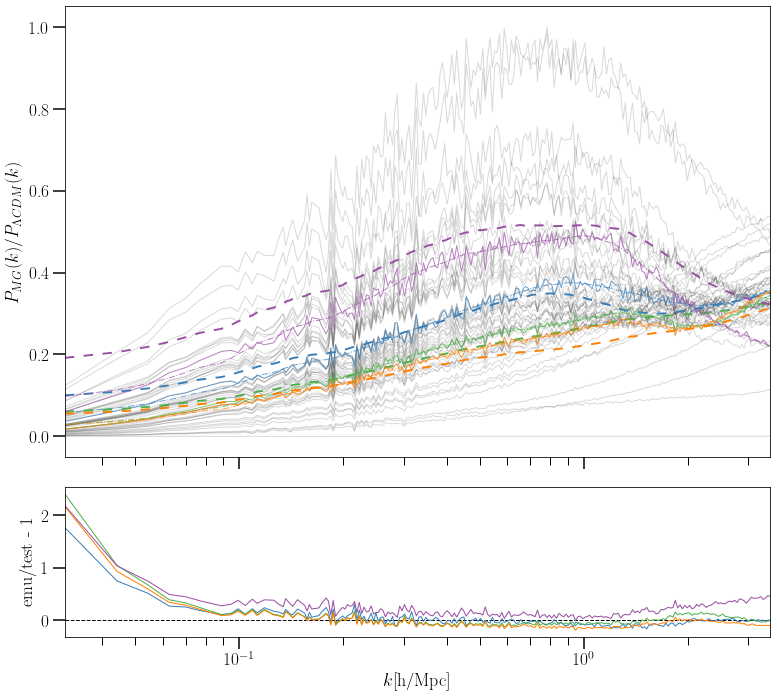

GPy_model_213Smooth_rank4snap97


In [9]:

##################################### TESTING ##################################

m1 = GPy.models.GPRegression.load_model(GPmodel + '.zip')

# pca_model = pickle.load(open(modelDir + 'GPy_PCA_model' + str(nRankMax), 'rb'))

PlotPrior = True

if PlotPrior:

#    plt.rcParams['axes.color_cycle'] = [ 'navy', 'forestgreen', 'darkred', 'gold']


    plt.rc('text', usetex=True)  # Slower
    plt.rc('font', size=12)  # 18 usually

    plt.figure(999, figsize=(14, 12))
    from matplotlib import gridspec

    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
    gs.update(hspace=0.1, left=0.2, bottom=0.15, wspace=0.25)
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])

    ax0.set_ylabel(r'$P_{MG}(k)/P_{{\Lambda}CDM}(k)$',  fontsize = 18)

    # ax1.axhline(y=-1e-6, ls='dashed')
    # ax1.axhline(y=1e-6, ls='dashed')

    ax1.set_xlabel(r'$k$[h/Mpc]',  fontsize = 18)
    ax1.axhline(y=0, ls='dashed')


#     ax0.set_yscale('log')
    ax0.set_xscale('log')
    ax1.set_xscale('log')

    ax1.set_ylabel(r'emu/test - 1',  fontsize = 18)
    # ax1.set_ylim(-5e-3, 5e-3)

    ax0.plot(kvals, PmPl.T, alpha=0.15, color='k')

    start, end = ax0.get_ylim()
#     ax0.yaxis.set_ticks((np.arange(start, end, 0.1)))
    ax0.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

# ax1.set_ylim(-9e-2, 9e-2)


ax0.set_xlim(kvals[0], kvals[-1])
ax1.set_xlim(kvals[0], kvals[-1])

ax0.set_xticklabels([])



color_id = 0
for x_id in del_idx:
    color_id = color_id + 1
#


# for x_id in [13, 24, 64, 83, 109]:
# for x_id in range(0, num_holdout):

    time0 = time.time()
    x_decodedGPy = Emu(parameter_array_all[x_id])  ## input parameters
    time1 = time.time()
    print('Time per emulation %0.2f' % (time1 - time0), ' s')
    x_test = PmPl_all[x_id]

    ax0.plot(kvals, x_decodedGPy, alpha=1.0, ls='--', lw = 1.9, dashes=(5, 5), label='emu', color=plt.cm.Set1(color_id))
    ax0.plot(kvals, x_test, alpha=0.7, label='test', color=plt.cm.Set1(color_id))
    ax0.plot(kvals, scipy.signal.savgol_filter(x_test, 51, 3), ls = '-.', alpha=0.7, label='test-smooth', color=plt.cm.Set1(color_id)) # window size 51, polynomial order 3


#     ax0.loglog(kvals, x_decodedGPy, alpha=1.0, ls='--', lw = 1.9, dashes=(5, 5), label='emu', color=plt.cm.Set1(color_id))
    #ax0.loglog(kvals, x_test, alpha=0.7, label='test', color=plt.cm.Set1(color_id))


#     plt.legend()

    ax1.plot( kvals, (x_decodedGPy[:]) / (x_test[:])  - 1, color=plt.cm.Set1(color_id))

# ax0.text(0.07, 1.4, 'z = %0.2f'%z_ID, fontsize= 18, style='italic')


plt.savefig(plotsDir + "Emu_snap" + str(snap_ID) + ".png",  bbox_inches="tight", dpi=200)

plt.show()



print(GPmodel)


In [52]:
Pm_min

0.99997662

[0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1.]
[0.498 0.507 0.509 0.487 0.49 ]
0


NameError: name 'cycle' is not defined

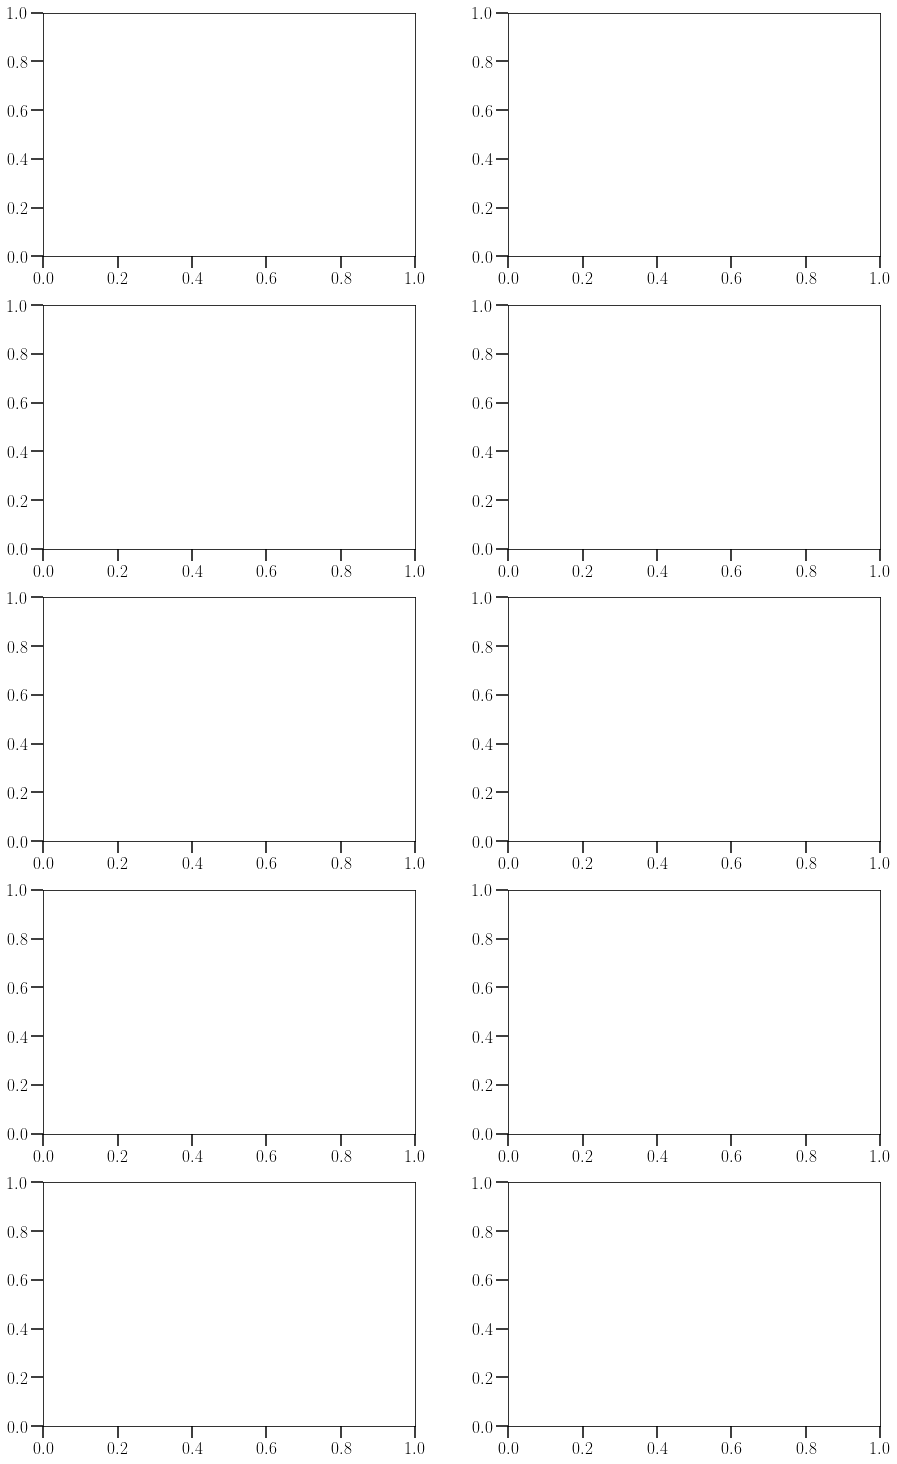

In [21]:


allMax = np.max(parameter_array, axis = 0)
allMin = np.min(parameter_array, axis = 0)
allMean = np.mean(parameter_array, axis = 0)

#allMean = 0.5*(allMax - allMin)

print(allMin)
print(allMax)
print(allMean)
Pk_mean = Emu(allMean) 


PlotCls = True

numPlots = 5

fig, ax = plt.subplots(5,2, figsize = (15,26))
# fig = plt.figure()
# fig.add_subplot(221)   #top left
# fig.add_subplot(222)   #top right
# fig.add_subplot(223)   #bottom left
# fig.add_subplot(224)   #bottom right
# plt.show()
plt.subplots_adjust(wspace=0.25)

if PlotCls:
    for paramNo in range(5):
        print(paramNo)
        para_range = np.linspace(allMin[paramNo], allMax[paramNo], numPlots)

        #plt.figure(32)
        lines = ["-","-.","--",":"]
        linecycler = cycle(lines)
        dashList = [(6,2),(10,1),(5,5),(3,3,2,2),(5,2,20,2)]
        colorList = ['r', 'g', 'k', 'b', 'brown']


        for plotID in range(numPlots):
            para_plot = np.copy(allMean)
            para_plot[paramNo] = para_range[plotID]  #### allMean gets changed everytime!!
            x_decodedGPy = Emu(para_plot) 
            lineObj = ax[4-paramNo,0].plot(kvals, x_decodedGPy, lw= 1.5, linestyle='--', dashes=dashList[plotID], color = colorList[plotID], label = allLabels[paramNo] + ' = %.1e'%para_range[plotID])
            #ax[paramNo,0].set_ylim(9.9, None)
            #ax[4-paramNo,0].set_yscale('log')
            ax[4-paramNo,0].set_xscale('log')
            ax[4-paramNo,0].set_ylabel(r'$P_{MG}(k)/P_{{\Lambda}CDM}(k)$')
            ax[4-paramNo,0].set_xlabel('$k$[h/Mpc]')
            #ticks = np.linspace(np.min(10**x_decodedGPy), np.max(10**x_decodedGPy), 5)
            #ticks = np.array([10, 15, 20, 25, 30, 35, 40])
            #ax[4-paramNo,0].set_yticks(ticks, minor = True)
            ax[4-paramNo,0].set_yticks([], minor = True)
            ax[4-paramNo,0].legend(iter(lineObj), para_range.round(decimals=2), title = allLabels[paramNo])
            ax[4-paramNo,0].legend()
            #ax[paramNo,0].legend(title = allLabels[paramNo])
            #ax[paramNo,1].set_yscale('log')
            ax[4-paramNo,1].set_xscale('log')
            ax[4-paramNo,1].set_ylabel(r'$\Delta f / f_0$')
            ax[4-paramNo,1].set_xlabel('$k$[h/Mpc]')
            #ax[paramNo,0].legend(iter(lineObj), para_range.round(decimals=2), title = allLabels[paramNo])
            #ax[paramNo,0].legend(title = allLabels[paramNo])
            ax[4-paramNo,1].plot(kvals, (x_decodedGPy)/(Pk_mean) - 1, lw= 1.5, linestyle='--', dashes=dashList[plotID], color = colorList[plotID], label = para_range[plotID] )


        start, end = ax[4-paramNo, 0].get_ylim()
        ax[4-paramNo, 0].yaxis.set_ticks( (np.arange(start, end, 0.1)))
        ax[4-paramNo, 0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))


fig.savefig(plotsDir + "sensitivity_snap" + str(snap_ID) + ".png",  bbox_inches="tight", dpi=200)

plt.show()





In [13]:
parameter_array.shape

(46, 5)

Text(0.5, 0, '$w_3$')

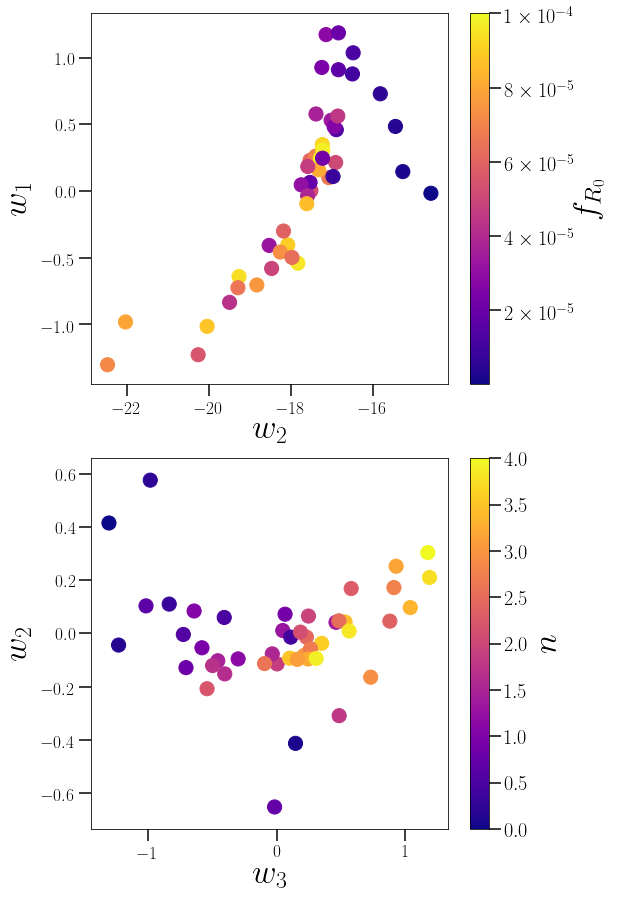

In [14]:
# plt.subplots(321, figsize = (16, 8))

weights_z = np.array(r('svd_weights2'))

def fmt(x, pos):
    a, b = '{:.0e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)


from mpl_toolkits.axes_grid1 import make_axes_locatable

f, a = plt.subplots(2, 1, figsize = (8, 15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=None)
plt.rcParams.update({'font.size': 14})
# divider = make_axes_locatable(a[1])

# cax = divider.append_axes('right', size='5%', pad=0.05)
im1 = a[0].scatter(weights_z[:, 0], weights_z[:, 1], c= parameter_array[:, 3], s = 200)
im2 = a[1].scatter(weights_z[:, 1], weights_z[:, 2], c= parameter_array[:, 4], s = 200)

# f.colorbar(a[1], cax=cax, orientation='vertical')
# f.colorbar(a[2], cax=cax, orientation='vertical')

cbar1 = f.colorbar(im1, ax=a[0], format=ticker.FuncFormatter(fmt))
cbar2 = f.colorbar(im2, ax=a[1])

cbar1.set_label(allLabels[3], fontsize = 34)
cbar2.set_label(allLabels[4], fontsize = 34)

a[0].set_ylabel(r'$w_1$', fontsize = 34)
a[0].set_xlabel(r'$w_2$', fontsize = 34)

a[1].set_ylabel(r'$w_2$', fontsize = 34)
a[1].set_xlabel(r'$w_3$', fontsize = 34)


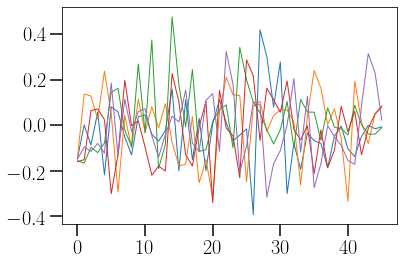

In [15]:
decomp = np.array(r('svd_decomp2'))
basis_b = np.array(decomp[1])
plt.plot(basis_b.T[:, :5])
plt.show()

(-0.2, 15)

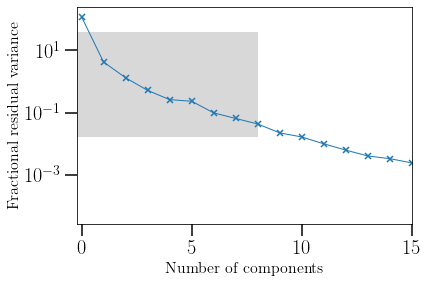

In [51]:
plt.plot(decomp[0], 'x-', )
plt.yscale('log')
plt.ylabel('Fractional residual variance', fontsize = 16)
plt.xlabel('Number of components', fontsize = 16)
plt.fill_between([-0.2, 8], [38, 38], [0.017, 0.017], facecolor='gray', alpha = 0.3)
plt.xlim(-0.2, 15)

### BOKEH 

## trial

In [40]:
''' Present an interactive function explorer with slider widgets.
Scrub the sliders to change the properties of the ``sin`` curve, or
type into the title text box to update the title of the plot.
Use the ``bokeh serve`` command to run the example by executing:
    bokeh serve sliders.py
at your command prompt. Then navigate to the URL
    http://localhost:5006/sliders
in your browser.

conda install -y bokeh
'''
import numpy as np

from bokeh.io import curdoc
from bokeh.layouts import row, column
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import Slider, TextInput
from bokeh.plotting import figure, show

# ## for notebook
import bokeh.io
bokeh.io.output_notebook()
##
# Set up data
N = 200
x = np.linspace(0, 4*np.pi, N)
y = np.sin(x)
source = ColumnDataSource(data=dict(x=x, y=y))


# Set up plot
plot = figure(plot_height=400, plot_width=400, title="my sine wave",
              tools="crosshair,pan,reset,save,wheel_zoom",
              x_range=[0, 4*np.pi], y_range=[-2.5, 2.5])

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)


# Set up widgets
text = TextInput(title="title", value='my sine wave')
offset = Slider(title="offset", value=0.0, start=-5.0, end=5.0, step=0.1)
amplitude = Slider(title="amplitude", value=1.0, start=-5.0, end=5.0, step=0.1)
phase = Slider(title="phase", value=0.0, start=0.0, end=2*np.pi)
freq = Slider(title="frequency", value=1.0, start=0.1, end=5.1, step=0.1)


# Set up callbacks
def update_title(attrname, old, new):
    plot.title.text = text.value

text.on_change('value', update_title)

def update_data(attrname, old, new):

    # Get the current slider values
    a = amplitude.value
    b = offset.value
    w = phase.value
    k = freq.value

    # Generate the new curve
    x = np.linspace(0, 4*np.pi, N)
    y = a*np.sin(k*x + w) + b

    source.data = dict(x=x, y=y)

for w in [offset, amplitude, phase, freq]:
    w.on_change('value', update_data)


# Set up layouts and add to document
inputs = column(text, offset, amplitude, phase, freq)

curdoc().add_root(row(inputs, plot, width=800))
curdoc().title = "testers"

show(plot, notebook_handle=True)


Loading BokehJS ...

In [38]:
from IPython.display import IFrame
IFrame('https://demo.bokeh.org/sliders', width=900, height=500)

In [41]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [68]:
x = kvals
y = emu_predict(para_plot) 

p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5),
           background_fill_color='#efefef')
r = p.line(x, y, color="#8888cc", line_width=1.5, alpha=0.8)


def update(f, w=1, A=1, phi=0):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    r.data_source.data['y'] = A * func(w * x + phi)
    push_notebook()
    
    
show(p, notebook_handle=True)


In [57]:
interact(update, f=["sin", "cos"], w=(0,50), A=(1,10), phi=(0, 20, 0.1))


interactive(children=(Dropdown(description='f', options=('sin', 'cos'), value='sin'), IntSlider(value=1, descr…

<function __main__.update(f, w=1, A=1, phi=0)>